In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 25.8 MB/s eta 0:00:00


In [2]:
def eig_val(filename):
    xlst = []
    ylst = []
    zlst = []

    dic = {
        'A': (0.9511, 0.309, -1),
        'B': (0.9511, 0.309, -1),
        'C': (0.809, 0.5878, -1),
        'D': (-0.9511, -0.309, 1),
        'E': (0.309, -0.9511, 1),
        'F': (-0.309, 0.9511, 1),
        'G': (0.5878, -0.809, -1),
        'H': (0.809, -0.5878, 1),
        'I': (-0.5878, 0.809, -1),
        'J': (-0.5878, 0.809, -1),
        'K': (-0.809, -0.5878, 1),
        'L': (-0.809, 0.5878, -1),
        'M': (0.5878, 0.809, 1),
        'N': (-0.5878, -0.809, -1),
        'O': (-0.5878, -0.809, -1),
        'P': (0.309, 0.9511, -1),
        'Q': (0.9511, -0.309, 1),
        'R': (-0.309, -0.9511, 1),
        'S': (0.0, -1.0, -1),
        'T': (1.0, 0.0, -1),
        'U': (1.0, 0.0, -1),
        'V': (0.0, 1.0, -1),
        'W': (-0.9511, 0.309, 1),
        'X': (-0.9511, 0.309, 1),
        'Y': (-1.0, 0.0, 1),
        'Z': (-1.0, 0.0, 1)
    }

    for elem in filename:
        if elem not in dic:
            raise ValueError(f"Invalid amino acid: {elem}")

        x, y, z = map(float, dic[elem])  # Ensure values are treated as floats
        xlst.append(x)
        ylst.append(y)
        zlst.append(z)

    xcom = np.mean(xlst)
    ycom = np.mean(ylst)
    zcom = np.mean(zlst)

    # Convert lists to numpy arrays for operations
    xlst = np.array(xlst) - xcom
    ylst = np.array(ylst) - ycom
    zlst = np.array(zlst) - zcom

    ixx=np.sum(np.square(ylst)+np.square(zlst))
    iyy=np.sum(np.square(xlst)+np.square(zlst))
    izz=np.sum(np.square(xlst)+np.square(ylst))
    ixy=np.sum(np.multiply(xlst,ylst))
    iyx=ixy
    iyz=np.sum(np.multiply(ylst,zlst))
    izy=iyz
    ixz=np.sum(np.multiply(xlst,zlst))
    izx=ixz

    # Eigenvalue calculation
    from numpy.linalg import eig
    evalue, evector = eig(np.array([[ixx, -ixy, -ixz],
                                     [-iyx, iyy, -iyz],
                                     [-izx, -izy, izz]]))

    return evalue

In [4]:
import pandas as pd
import numpy as np
cep = pd.read_csv("fretrieve.csv")
exp = np.array(cep.iloc[:,[-1]]).flatten()# Extract Experimental gene id
exp = list(exp[:170])
pre = np.array(cep.iloc[:,[1]]).flatten()# Extract Predicted gene id
pre = list(pre)
print(exp)
#Data Correction
print(pre)


['Q09428', 'Q9P2N4', 'O95622', 'Q15848', 'P31751', 'P59780', 'P18847', 'P16615', 'Q93084', 'Q8WXX7', 'P10415', 'Q07817', 'O43521', 'Q93088', 'P15056', 'Q8NCU7', 'A6NLJ0', 'P01024', 'Q9HC96', 'P42574', 'Q14790', 'P04040', 'Q6IB77', 'P35520', 'Q53HC0', 'P30279', 'Q5VV42', 'Q16878', 'Q8N5K1', 'Q8IY22', 'P50416', 'P13498', 'P05177', 'Q16760', 'P42892', 'P05305', 'P25101', 'P24530', 'P00533', 'P22413', 'Q52LR7', 'P14921', 'Q9H0X4', 'P25445', 'P49327', 'Q9NSA1', 'Q9C0B1', 'P01275', 'P47871', 'P35557', 'Q12851', 'Q14397', 'Q8NEA6', 'P43220', 'P16520', 'P55259', 'P43304', 'P07203', 'Q14449', 'P09488', 'Q03014', 'P19367', 'Q30154', 'Q9NP66', 'P17096', 'P09601', 'P20823', 'P35680', 'P41235', 'P00738', 'P02790', 'P10997', 'P05362', 'P41134', 'Q9Y6M1', 'P78552', 'O15357', 'P01308', 'P06213', 'P35568', 'Q9Y4H2', 'P56199', 'Q8WWA0', 'Q9NQC1', 'Q86VZ6', 'Q14654', 'Q96T55', 'P51787', 'A8MYU2', 'Q9UEF7', 'Q3SY56', 'Q8TD94', 'Q6VAB6', 'Q8WXI2', 'P41159', 'O15243', 'P48357', 'P11150', 'Q7L5Y9', 'Q9UQF2',

In [6]:
from Bio import Entrez, SeqIO
import numpy as np

# Set up Entrez email
Entrez.email = '19phmp03@uohyd.ac.in'  # Always provide a valid email for NCBI access

def retrieve(filename):
    """
    Fetch protein sequences by ID from NCBI and compute eigenvalues for each sequence.

    Args:
    filename (str or list): Protein ID(s) to be fetched from NCBI.

    Returns:
    lst1 (list): List of eigenvalues for each protein sequence.
    """
    try:
        # Fetch protein sequences from NCBI by their IDs
        handle = Entrez.efetch(db='protein', id=filename, rettype='fasta', retmode='text')
        records = list(SeqIO.parse(handle, 'fasta'))  # Parse FASTA records into a list

        if len(records) == 0:
            raise ValueError(f"No records found for the ID: {filename}")

        # Display description of the last retrieved record
        print("Last retrieved sequence description:", records[-1].description)

        # Initialize list to store eigenvalues for each sequence
        lst1 = []

        # Process each sequence record
        for record in records:
            # Check if the sequence is valid
            sequence = str(record.seq)
            if len(sequence) == 0:
                raise ValueError(f"Empty sequence found for record: {record.id}")

            # Compute eigenvalues for the sequence
            eigenvalues = eig_val(sequence)  # Assuming sequence is passed as a string
            lst1.append(eigenvalues)

        return lst1

    except Exception as e:
        print(f"Error retrieving or processing sequences: {e}")
        return []


In [5]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis

def database1(file1, file2):
    print(f"Retrieving eigenvalues for experimental IDs: {file1}")
    print(f"Retrieving eigenvalues for predicted IDs: {file2}")

    exp_eigenvalues = retrieve(file1)
    pre_eigenvalues = retrieve(file2)

    if len(exp_eigenvalues) == 0 or len(pre_eigenvalues) == 0:
        raise ValueError("No eigenvalues found for one or both inputs. Please check the filenames.")

    # Combine experimental and predicted eigenvalues to calculate covariance
    combined_data = np.vstack((exp_eigenvalues, pre_eigenvalues))
    covariance_matrix = np.cov(combined_data, rowvar=False)
    inv_cov_matrix = np.linalg.inv(covariance_matrix)

    # Initialize a distance matrix
    distance_matrix = np.zeros((len(exp_eigenvalues), len(pre_eigenvalues)))

    # Calculate Mahalanobis distances
    for i, exp_elem in enumerate(exp_eigenvalues):
        for j, pre_elem in enumerate(pre_eigenvalues):
            # Compute Mahalanobis distance
            distance_matrix[i, j] = mahalanobis(exp_elem, pre_elem, inv_cov_matrix)

    # Create a DataFrame with appropriate indices and columns
    df = pd.DataFrame(distance_matrix, index=[f"Exp_{i+1}" for i in range(len(exp_eigenvalues))],
                      columns=[f"Pre_{j+1}" for j in range(len(pre_eigenvalues))])

    return df

In [7]:
y = database1(exp, pre)
print(y)

Retrieving eigenvalues for experimental IDs: ['Q09428', 'Q9P2N4', 'O95622', 'Q15848', 'P31751', 'P59780', 'P18847', 'P16615', 'Q93084', 'Q8WXX7', 'P10415', 'Q07817', 'O43521', 'Q93088', 'P15056', 'Q8NCU7', 'A6NLJ0', 'P01024', 'Q9HC96', 'P42574', 'Q14790', 'P04040', 'Q6IB77', 'P35520', 'Q53HC0', 'P30279', 'Q5VV42', 'Q16878', 'Q8N5K1', 'Q8IY22', 'P50416', 'P13498', 'P05177', 'Q16760', 'P42892', 'P05305', 'P25101', 'P24530', 'P00533', 'P22413', 'Q52LR7', 'P14921', 'Q9H0X4', 'P25445', 'P49327', 'Q9NSA1', 'Q9C0B1', 'P01275', 'P47871', 'P35557', 'Q12851', 'Q14397', 'Q8NEA6', 'P43220', 'P16520', 'P55259', 'P43304', 'P07203', 'Q14449', 'P09488', 'Q03014', 'P19367', 'Q30154', 'Q9NP66', 'P17096', 'P09601', 'P20823', 'P35680', 'P41235', 'P00738', 'P02790', 'P10997', 'P05362', 'P41134', 'Q9Y6M1', 'P78552', 'O15357', 'P01308', 'P06213', 'P35568', 'Q9Y4H2', 'P56199', 'Q8WWA0', 'Q9NQC1', 'Q86VZ6', 'Q14654', 'Q96T55', 'P51787', 'A8MYU2', 'Q9UEF7', 'Q3SY56', 'Q8TD94', 'Q6VAB6', 'Q8WXI2', 'P41159', 'O15

In [8]:
y.head()

,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_9,Pre_10,...,Pre_2886,Pre_2887,Pre_2888,Pre_2889,Pre_2890,Pre_2891,Pre_2892,Pre_2893,Pre_2894,Pre_2895
Exp_1,2.377283,3.242972,3.414684,1.654526,3.365354,3.484081,1.616089,1.854725,0.476591,0.230473,...,3.458908,2.725496,5.300257,3.629733,3.453615,3.384925,3.608315,3.585621,3.294873,7.799856
Exp_2,2.379688,2.340462,0.597877,5.207052,0.998719,1.674116,2.703111,2.556374,3.429889,3.716209,...,1.714510,2.326155,2.280852,1.786439,1.712192,1.809077,2.239986,2.124855,1.841532,7.473699
Exp_3,1.488806,1.453365,1.157169,4.825978,0.379700,0.911962,1.940642,1.753235,2.860677,3.196309,...,1.128579,1.436212,3.179464,1.014602,0.923669,0.983733,2.013767,1.867066,1.236029,7.659575
Exp_4,1.316770,0.468291,2.454479,5.285726,1.220561,0.529969,2.084124,1.838198,3.204490,3.586331,...,1.712473,0.936467,4.279531,0.368668,1.142757,1.087294,2.853077,2.690544,1.813789,8.659063
Exp_5,1.389683,0.686773,2.170789,5.283038,0.931465,0.268099,2.121992,1.879668,3.215735,3.592200,...,1.600311,1.038358,3.963077,0.072394,1.050320,1.026637,2.731543,2.567934,1.722639,8.526151


In [9]:
import plotly.graph_objects as go

z_data = y
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_layout(title='Distance Matrix', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [19]:
import numpy as np
import plotly.graph_objects as go

# Function to replace outliers with the mean of non-outliers
def replace_outliers_with_mean(df, threshold):
    # Calculate the mean of non-outlier values
    non_outlier_mean = df[df <= threshold].mean().mean()  # Overall mean of non-outliers
    # Replace outliers with the non-outlier mean
    filtered_df = df.map(lambda x: x if x <= threshold else non_outlier_mean)
    return filtered_df

# Define a custom threshold
custom_threshold = 11

# Replace outliers with the mean of non-outlier values
df_without_outliers = replace_outliers_with_mean(y, custom_threshold)

# Print the maximum value before replacing outliers
print(f"Max value before outlier replacement: {y.max().max()}")

# Print the maximum value after replacing outliers
print(f"Max value after outlier replacement: {df_without_outliers.max().max()}")

# Check for any remaining outliers after replacement
remaining_outliers_count = (df_without_outliers > df_without_outliers.quantile(0.75) + 1.5 * (df_without_outliers.quantile(0.75) - df_without_outliers.quantile(0.25))).sum().sum()
print(f"Remaining outliers after replacement: {remaining_outliers_count}")

# Recalculate the distance matrix after outlier replacement
z_data_no_outliers = df_without_outliers
fig_no_outliers = go.Figure(data=[go.Surface(z=z_data_no_outliers.values)])
fig_no_outliers.update_layout(title='Distance Matrix (Without Outliers)', autosize=False,
                              width=1000, height=1000,
                              margin=dict(l=65, r=50, b=65, t=90))

# Show the updated plot
fig_no_outliers.show()

# Compare size before and after outlier replacement
print(f"Original size: {y.shape}")
print(f"Size after replacing outliers with mean: {df_without_outliers.shape}")

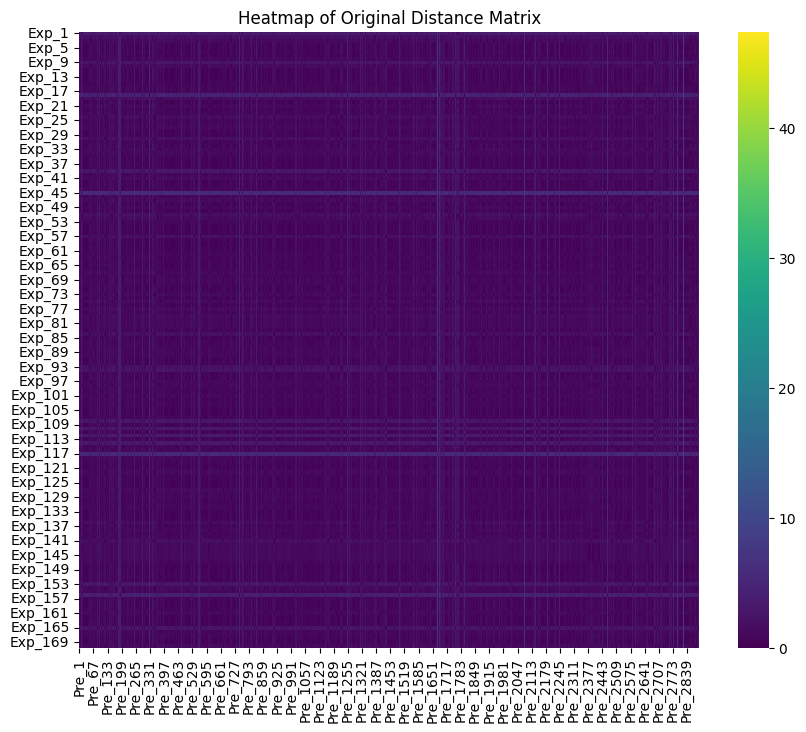

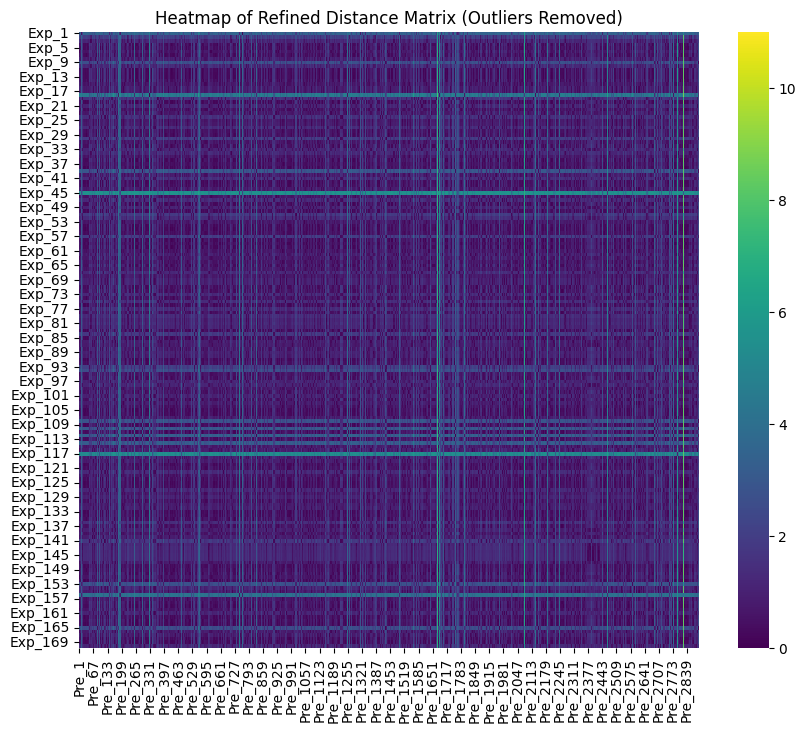

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Original Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(y, cmap='viridis')
plt.title("Heatmap of Original Distance Matrix")
plt.show()

# Heatmap for Refined Distance Matrix (Outliers Removed)
plt.figure(figsize=(10, 8))
sns.heatmap(df_without_outliers, cmap='viridis')
plt.title("Heatmap of Refined Distance Matrix (Outliers Removed)")
plt.show()

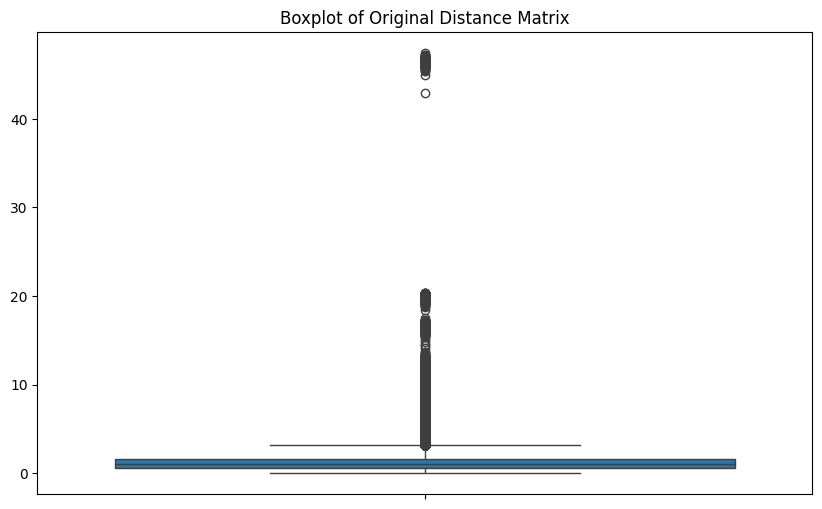

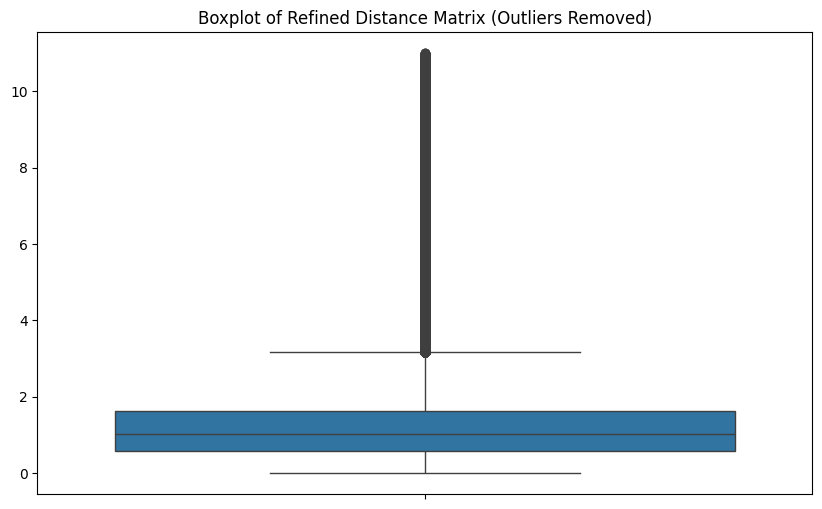

In [21]:
# Boxplot of Original Distance Matrix
plt.figure(figsize=(10, 6))
sns.boxplot(data=y.values.flatten())
plt.title("Boxplot of Original Distance Matrix")
plt.show()

# Boxplot of Refined Distance Matrix (Outliers Removed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_without_outliers.values.flatten())
plt.title("Boxplot of Refined Distance Matrix (Outliers Removed)")
plt.show()

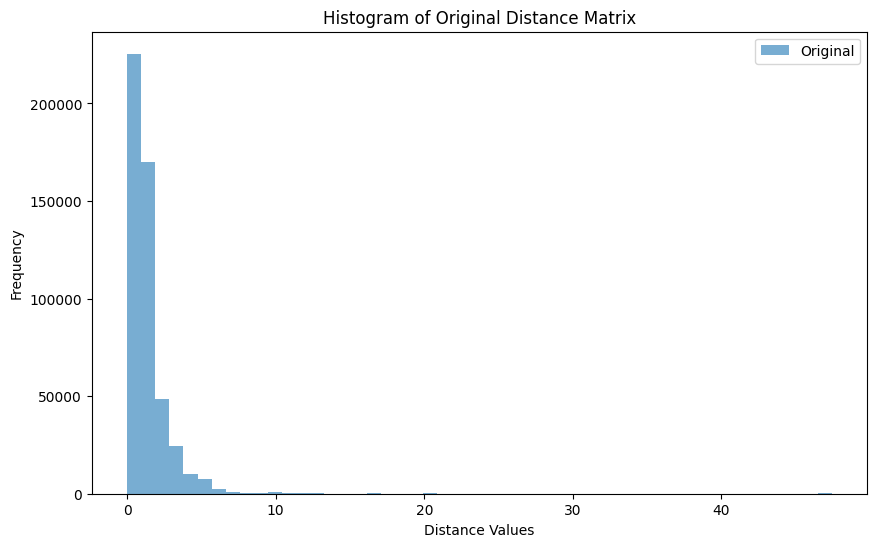

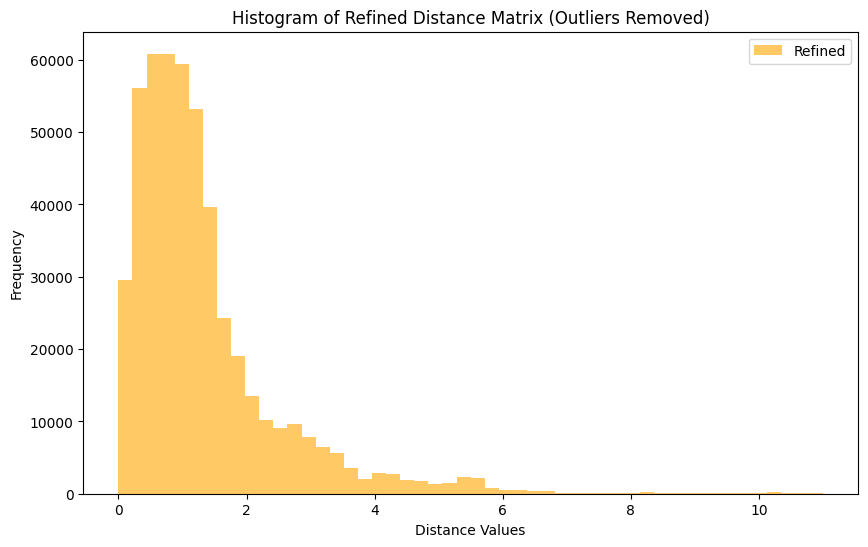

In [22]:
# Histogram for Original Distance Matrix
plt.figure(figsize=(10, 6))
plt.hist(y.values.flatten(), bins=50, alpha=0.6, label='Original')
plt.title("Histogram of Original Distance Matrix")
plt.xlabel("Distance Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Histogram for Refined Distance Matrix (Outliers Removed)
plt.figure(figsize=(10, 6))
plt.hist(df_without_outliers.values.flatten(), bins=50, alpha=0.6, label='Refined', color='orange')
plt.title("Histogram of Refined Distance Matrix (Outliers Removed)")
plt.xlabel("Distance Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

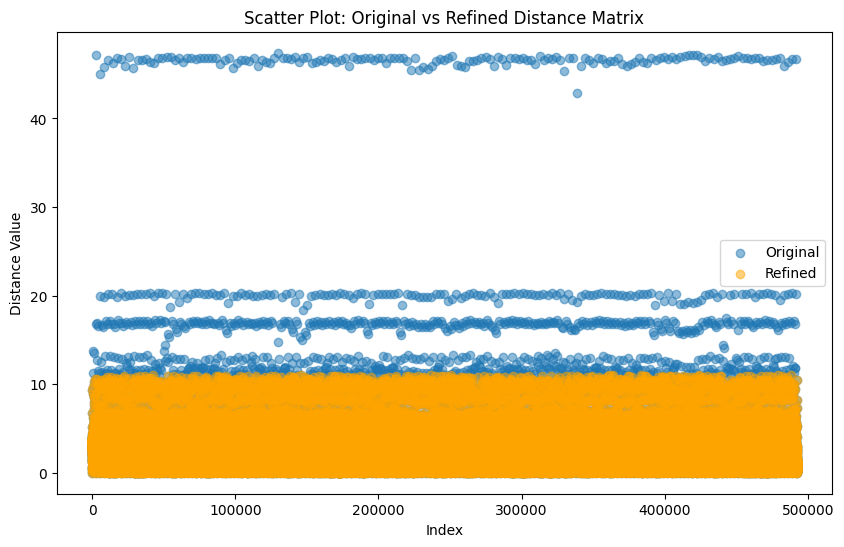

In [23]:
# Scatter plot comparing original and refined distance values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y.values.flatten())), y.values.flatten(), label='Original', alpha=0.5)
plt.scatter(range(len(df_without_outliers.values.flatten())), df_without_outliers.values.flatten(), label='Refined', alpha=0.5, color='orange')
plt.title("Scatter Plot: Original vs Refined Distance Matrix")
plt.xlabel("Index")
plt.ylabel("Distance Value")
plt.legend()
plt.show()

In [24]:
# Calculate the difference matrix between original and refined
diff_matrix = y - df_without_outliers

# 3D Surface plot of the difference matrix
fig_diff = go.Figure(data=[go.Surface(z=diff_matrix.values)])
fig_diff.update_layout(title='Difference Matrix (Original - Refined)', autosize=False,
                       width=1000, height=1000,
                       margin=dict(l=65, r=50, b=65, t=90))
fig_diff.show()

In [25]:
df_without_outliers.to_numpy().max()

10.998196530969713

In [26]:
df_without_outliers.head()

,Pre_1,Pre_2,Pre_3,Pre_4,Pre_5,Pre_6,Pre_7,Pre_8,Pre_9,Pre_10,...,Pre_2886,Pre_2887,Pre_2888,Pre_2889,Pre_2890,Pre_2891,Pre_2892,Pre_2893,Pre_2894,Pre_2895
Exp_1,2.377283,3.242972,3.414684,1.654526,3.365354,3.484081,1.616089,1.854725,0.476591,0.230473,...,3.458908,2.725496,5.300257,3.629733,3.453615,3.384925,3.608315,3.585621,3.294873,7.799856
Exp_2,2.379688,2.340462,0.597877,5.207052,0.998719,1.674116,2.703111,2.556374,3.429889,3.716209,...,1.714510,2.326155,2.280852,1.786439,1.712192,1.809077,2.239986,2.124855,1.841532,7.473699
Exp_3,1.488806,1.453365,1.157169,4.825978,0.379700,0.911962,1.940642,1.753235,2.860677,3.196309,...,1.128579,1.436212,3.179464,1.014602,0.923669,0.983733,2.013767,1.867066,1.236029,7.659575
Exp_4,1.316770,0.468291,2.454479,5.285726,1.220561,0.529969,2.084124,1.838198,3.204490,3.586331,...,1.712473,0.936467,4.279531,0.368668,1.142757,1.087294,2.853077,2.690544,1.813789,8.659063
Exp_5,1.389683,0.686773,2.170789,5.283038,0.931465,0.268099,2.121992,1.879668,3.215735,3.592200,...,1.600311,1.038358,3.963077,0.072394,1.050320,1.026637,2.731543,2.567934,1.722639,8.526151


In [27]:
#y.to_csv('dist_matrixT2DM.csv')
#files.download('dist_matrixT2DM.csv')
#x = np.array(y.iloc[:,[1410]])
x = np.array(df_without_outliers.iloc[:,[1410]])
x

array([[3.39908278],
       [1.63495429],
       [0.77322895],
       [0.58118938],
       [0.38956529],
       [0.74505507],
       [0.51531978],
       [0.46519516],
       [2.43773799],
       [0.89236732],
       [0.55133675],
       [0.52329158],
       [0.53481017],
       [0.49377131],
       [0.16234979],
       [0.69031461],
       [0.67481256],
       [4.24248463],
       [1.47282703],
       [0.45194602],
       [1.05351581],
       [0.12274281],
       [0.74845036],
       [1.26584046],
       [0.53816269],
       [0.64738002],
       [1.10587973],
       [0.52486059],
       [0.57222789],
       [1.62306026],
       [0.21224318],
       [0.65635908],
       [1.08219866],
       [0.73262084],
       [0.19501807],
       [0.52670333],
       [0.29430808],
       [0.27753195],
       [2.70194555],
       [0.36393813],
       [1.12549243],
       [0.31425453],
       [0.32533401],
       [0.62353971],
       [5.47333843],
       [0.71017344],
       [1.08544678],
       [0.556

In [28]:
#Row Elimination
df = df_without_outliers
df_without_outliers.to_numpy().max()
#df2 = df.drop(df.columns[[0, 4, 2]], axis=1, inplace=True)
#print(df.to_numpy().max())
x = np.array(df.iloc[:,:])
#x = np.array(df.iloc[[162],:])
row_index = np.where(x == x.max())
print(row_index)
x.tolist()
print(x.max())
x.sort()
np.array(df.iloc[row_index[0]])



(array([146]), array([1152]))
10.998196530969713


array([[0.53399747, 0.39390643, 2.42312087, ..., 2.52913667, 1.66423114,
        8.37868179]])

In [29]:
#Column Elimination
df = df_without_outliers
#df2 = df.drop(df.columns[[2583]], axis=1, inplace=True) #157,731,1330,1415,1572,1778,2119,2414,
#print(df.to_numpy().max())
m = 1396
print(np.array(df.iloc[:10,m]))
print(np.array(df.iloc[:,m]).max())
#print(y.to_numpy().max())
#print(df.to_numpy().max())


print(df.columns[m])



[3.40427463 1.19719552 0.44252551 0.97867681 0.69091906 1.14886817
 0.99725404 0.05173135 2.48527183 0.59171987]
5.426984838375195
Pre_1397


In [30]:
df.to_numpy()
df = np.sort(df)
np.flip(df)

array([[10.45139877,  9.99598237,  9.97662552, ...,  0.04657439,
         0.01257993,  0.        ],
       [10.97896044, 10.46625405, 10.39233481, ...,  0.034421  ,
         0.03290955,  0.        ],
       [10.85927812, 10.43586531, 10.33658354, ...,  0.02844543,
         0.02825221,  0.        ],
       ...,
       [10.49791591, 10.26783551,  9.93298562, ...,  0.0670224 ,
         0.06118069,  0.        ],
       [10.62796357, 10.10645387, 10.03747556, ...,  0.12253338,
         0.07336566,  0.        ],
       [10.56969192, 10.21723825,  9.70698681, ...,  0.16049908,
         0.13392377,  0.        ]])

In [31]:
# Handle NaN values - Option 1: Drop rows/columns with NaN values
#df_cleaned = df_without_outliers.dropna(how='any')  # Drop rows with any NaN values
# Alternatively, you can drop columns with NaN values using dropna(axis=1)
df = df_without_outliers
# Handle NaN values - Option 2: Fill NaN values with a specific number (e.g., 0 or column mean)
#df_cleaned = df_without_outliers.fillna(0)  # Replace NaN values with 0
#df_cleaned = df_without_outliers.fillna(df_without_outliers.mean())  # Replace NaN values with column mean

# Now calculate max_val based on cleaned data
max_val = int(df.to_numpy().max() - df.to_numpy().min())  # difference between max. dist and min dist
threshold = 0.01 * max_val

# Binary transformation based on threshold
df1 = df.where(df <= threshold, 0)  # Entries <= threshold survive, others set to 0
df2 = df1.where(df > threshold, 1)  # Entries > threshold set to 1

# Resulting Binary Matrix
print(df2)

         Pre_1  Pre_2  Pre_3  Pre_4  Pre_5  Pre_6  Pre_7  Pre_8  Pre_9  \
Exp_1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
Exp_166    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_167    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_168    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_169    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Exp_170    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         Pre_10  ...  Pre_2886  Pre_2887  Pre_2888  Pre_2889  Pre_2890  \
Exp_1       0.0  ...       0.0       

In [41]:
freq_dist = pd.DataFrame(df2.sum())
freq_dist.columns = ['Frequency']
Thresold_val = 13 # Sequences whose Frequency is less than the thresold_value shall be removed
filtered = freq_dist[freq_dist['Frequency'] >= Thresold_val]
filtered = filtered.sort_values(by=['Frequency'])
filtered.to_csv('file1.csv')



In [42]:
for i in range(Thresold_val,int(df2.sum().max())+1):
    same_freq_lst = []
    row_index = np.where(filtered == i)
    for j in range(len(row_index[0])):
        same_freq_lst.append(filtered.iloc[row_index[0][j]].name)
    #print(same_freq_lst)
    df3 = pd.DataFrame(df,columns=same_freq_lst)
    df4 = df3.where(df3 <= threshold,0)# entries whose val is less the thresold will survive, 0 otherwise
    df4 = df4 / threshold
    freq_dist = pd.DataFrame(df4.sum())
    #freq_dist
    freq_dist.columns = ['Frequency']
    freq_dist.sort_values('Frequency',ascending = True)
    freq_dist.to_csv('fileterd_freq.csv')

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming 'x' is defined and contains your data
lab = list(range(0, 49))  # Adjust the range based on your data size
linkage_matrix = linkage(x, "single")

# Set up the figure size
plt.figure(figsize=(250, 70))  # High dimensions for the figure
dendrogram(linkage_matrix)  # You can label with the appropriate indices or names
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Save the figure as an image
plt.savefig('dendrogram.png', dpi=150, bbox_inches='tight')  # Save as PNG with high DPI
plt.close()  # Close the figure to free up memory